<a href="https://colab.research.google.com/github/SeathWR/Analisis_dedatos/blob/main/Ames_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

##Importacion de librerias

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [74]:
housing = pd.read_csv("/content/AmesHousing.csv")

In [75]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [76]:
housing.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [77]:
housing.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [78]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [79]:
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [80]:
housing['Garage Area'].sum()
housing['Garage Area'].value_counts()

,count
Garage Area,
0.0,157
576.0,97
440.0,96
484.0,76
240.0,69
...,...
715.0,1
902.0,1
595.0,1


In [81]:
housing.columns = housing.columns.str.strip().str.lower().str.replace(' ', '_')

In [82]:
housing['lot_frontage'] = housing['lot_frontage'].fillna(0)

In [13]:
housing.isnull().sum()

,0
order,0
pid,0
ms_subclass,0
ms_zoning,0
lot_frontage,0
...,...
mo_sold,0
yr_sold,0
sale_type,0
sale_condition,0


In [16]:
housing.columns = housing.columns.str.replace(' ', '')

In [31]:
numeric_feats = housing.dtypes[housing.dtypes != "object"].index

In [32]:
categorical_feats = housing.dtypes[housing.dtypes == "object"].index

In [40]:
detele_columns = ['PID', 'Alley', 'Fence', 'Order']

In [41]:
housing.drop(detele_columns, axis=1, inplace=True)

In [43]:
housing_correlation = housing.select_dtypes(include=[np.number])

In [44]:
corr_matrix = housing_correlation.corr()

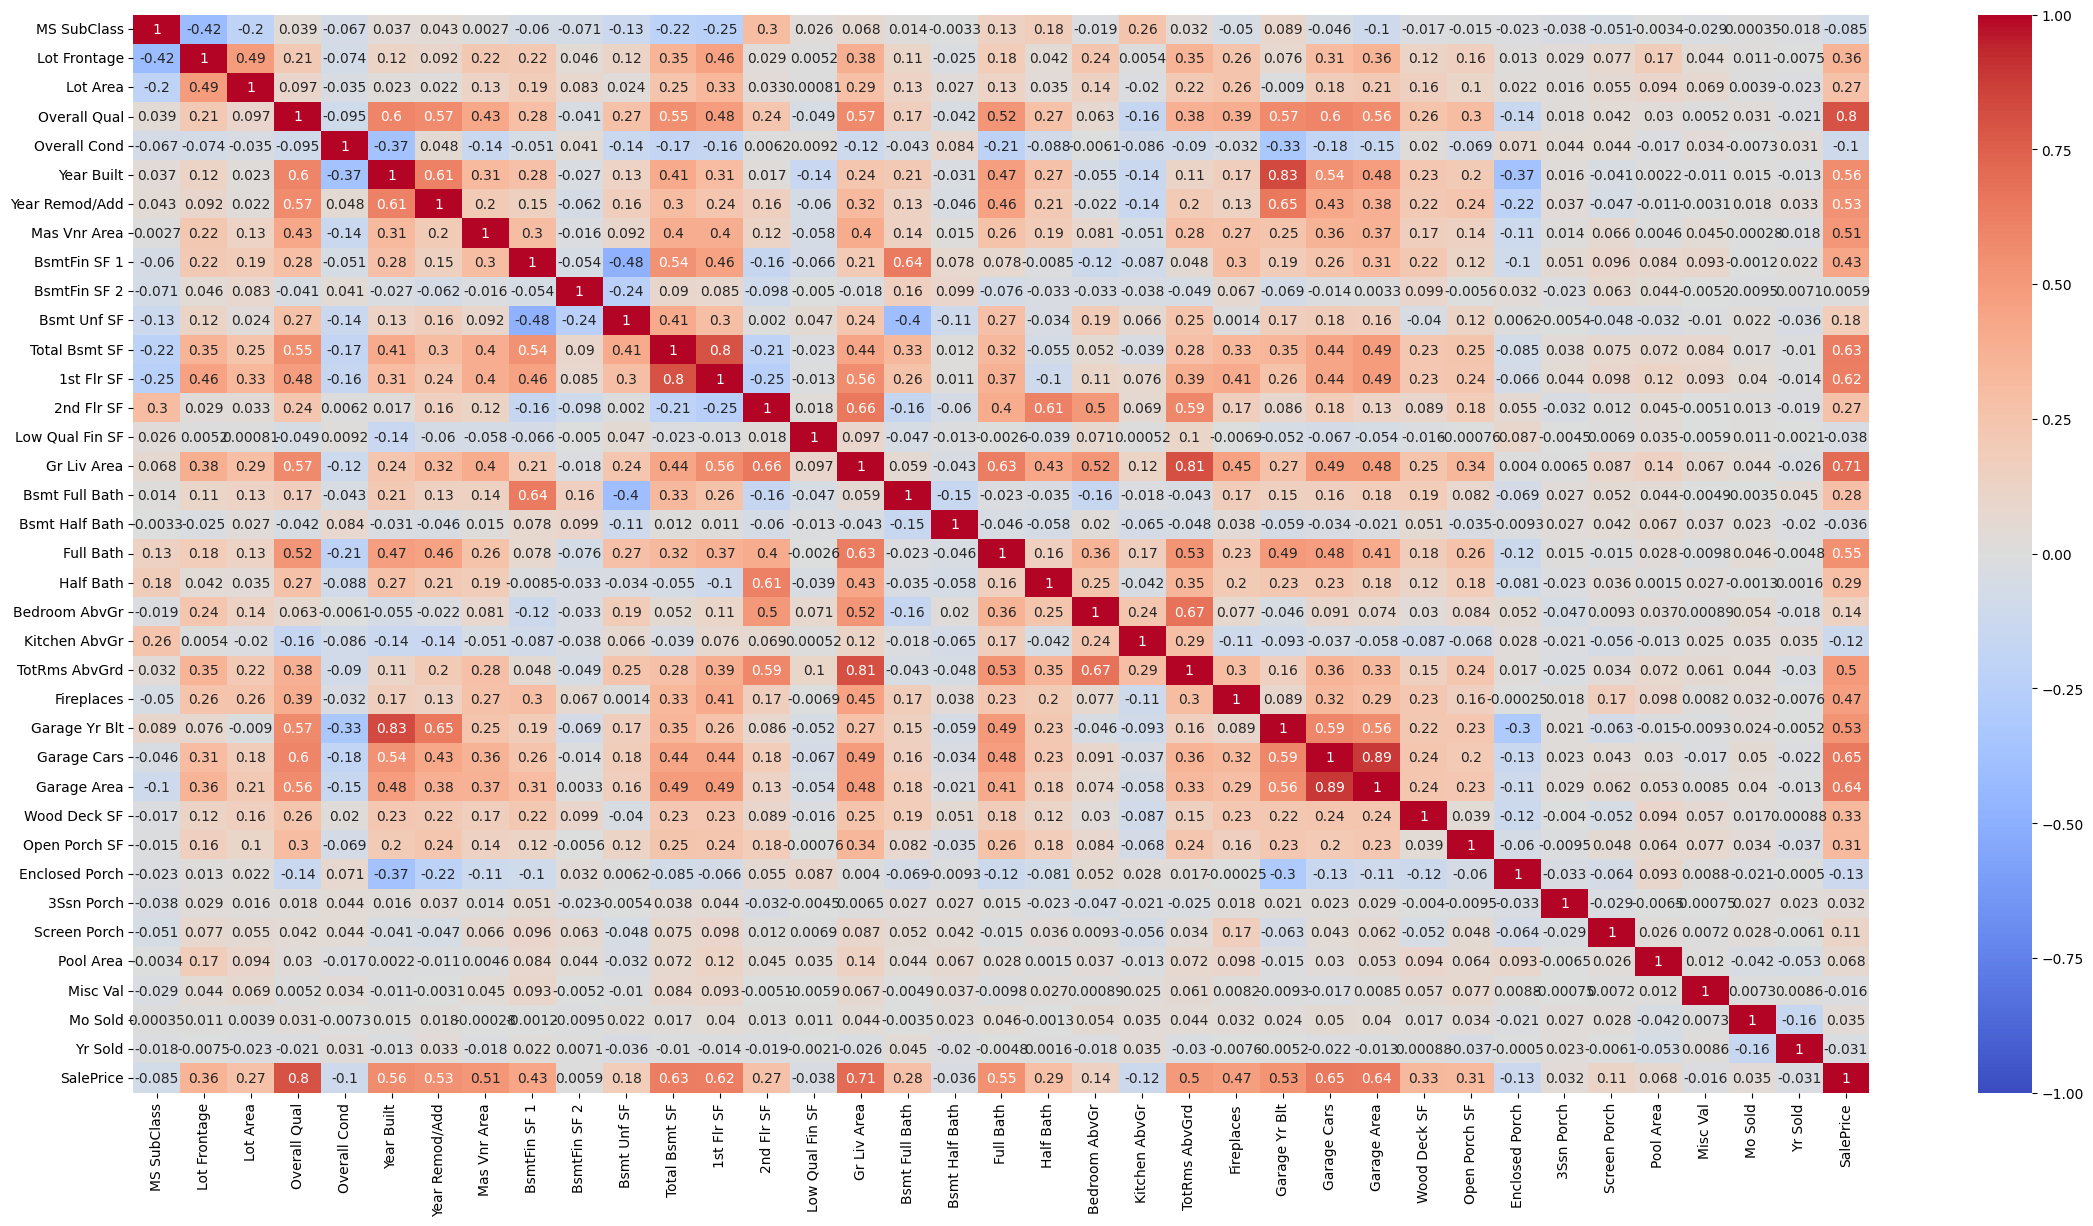

In [51]:
plt.figure(figsize=(28, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

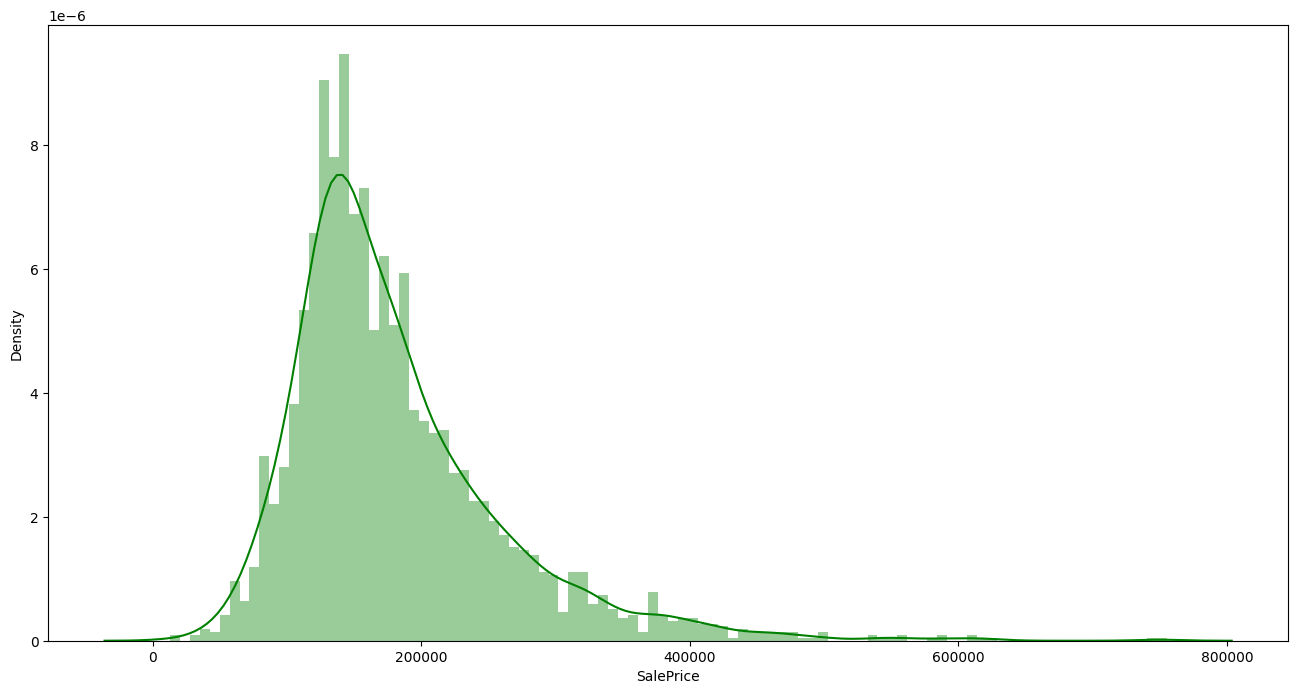

In [50]:
plt.figure(figsize=(16, 8))
sns.distplot(housing['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

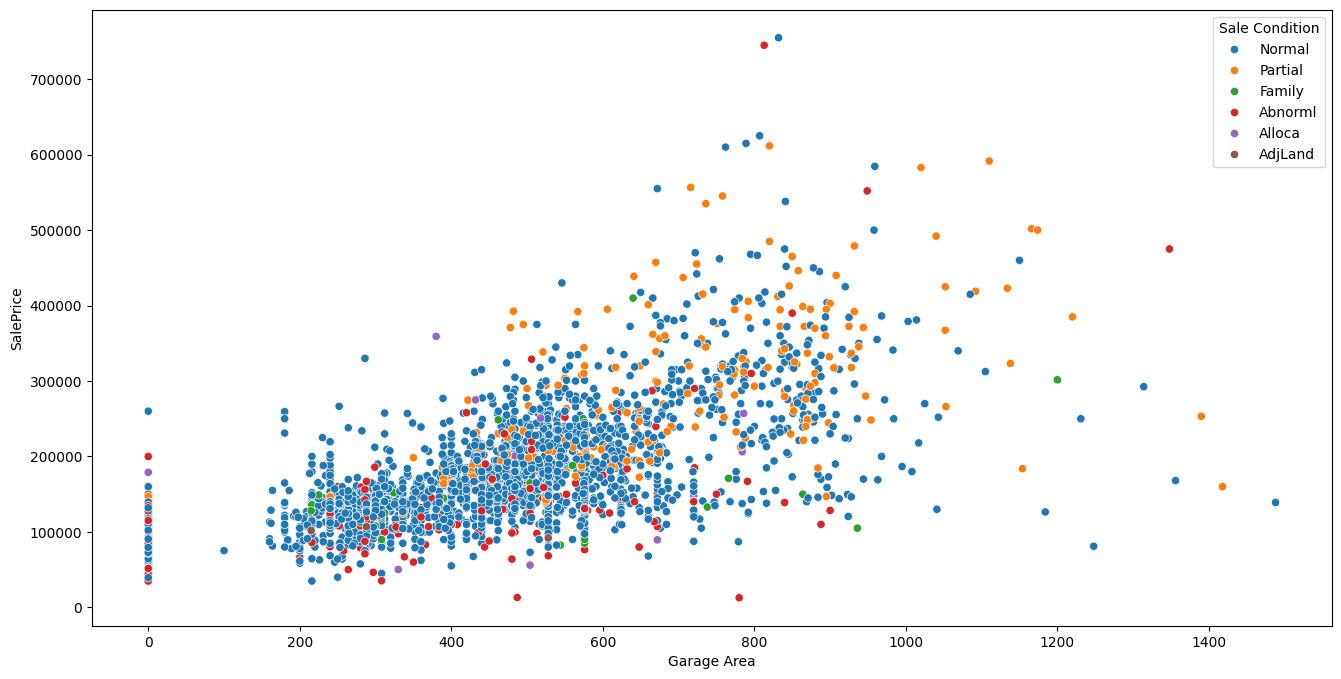

In [53]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Garage Area', y='SalePrice', hue='Sale Condition' ,data=housing)
plt.show()

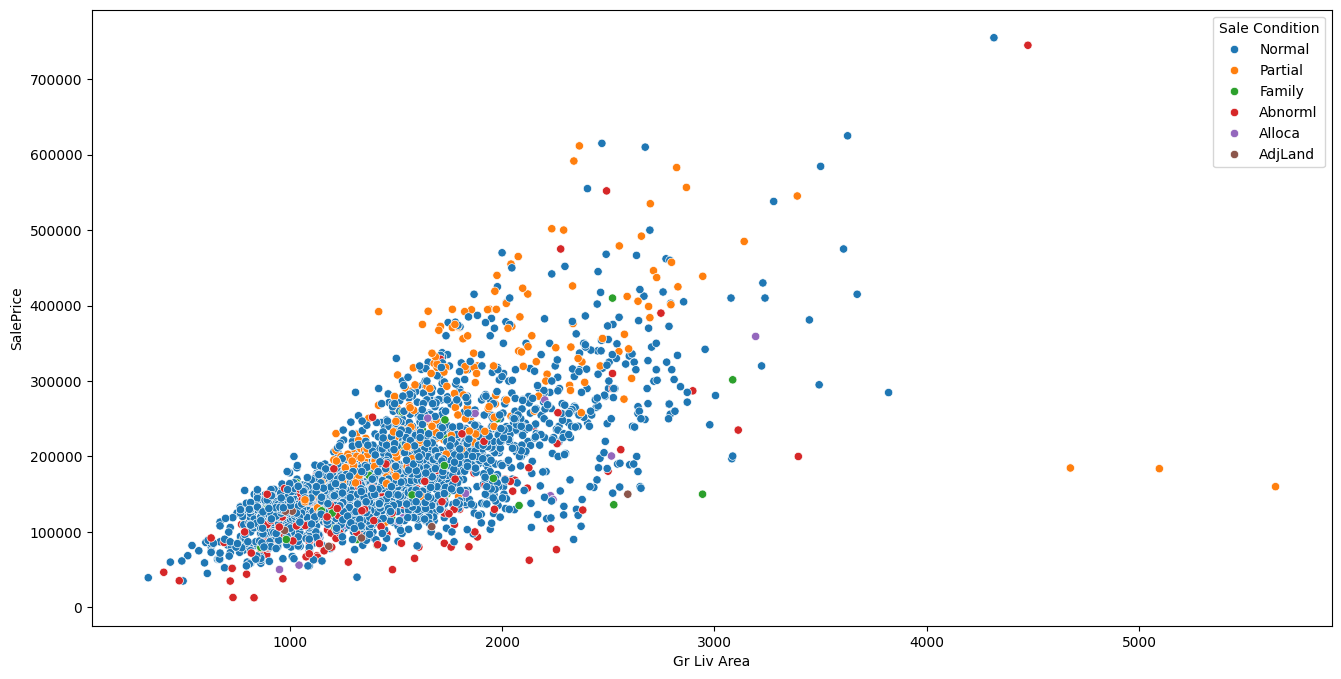

In [59]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', hue='Sale Condition' ,data=housing)
plt.show()

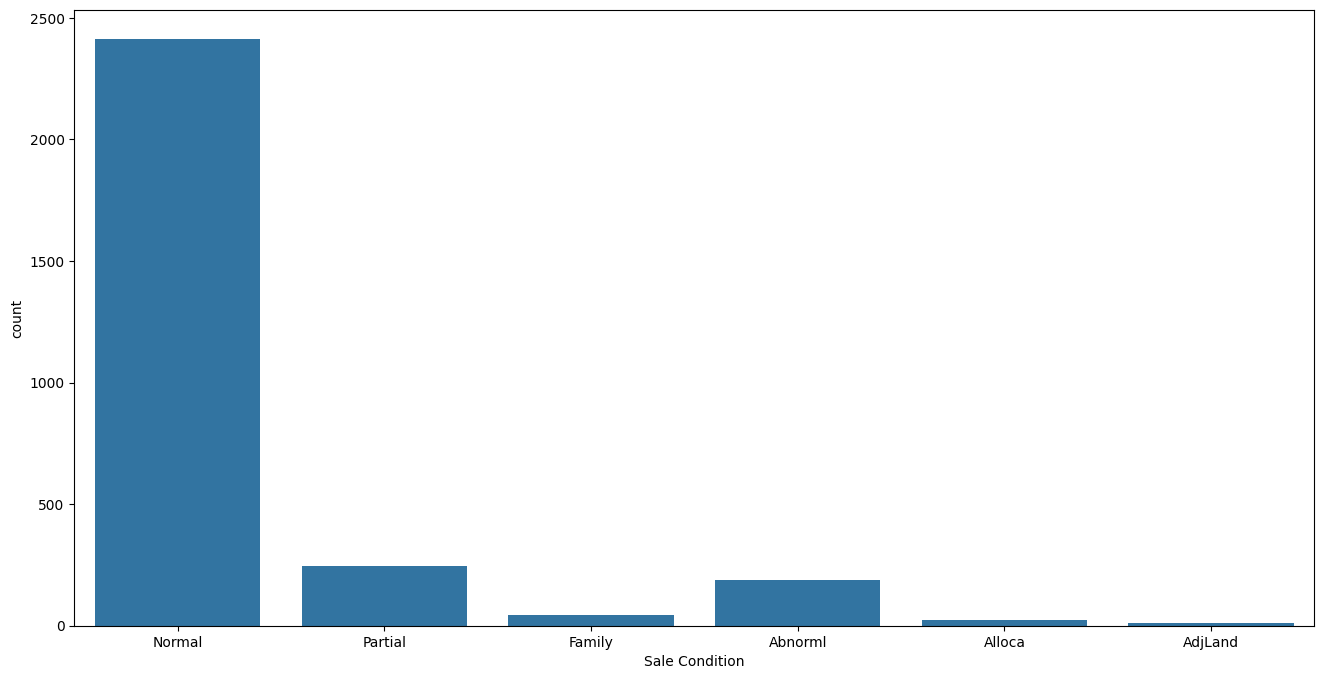

In [60]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Sale Condition', data=housing)
plt.show()

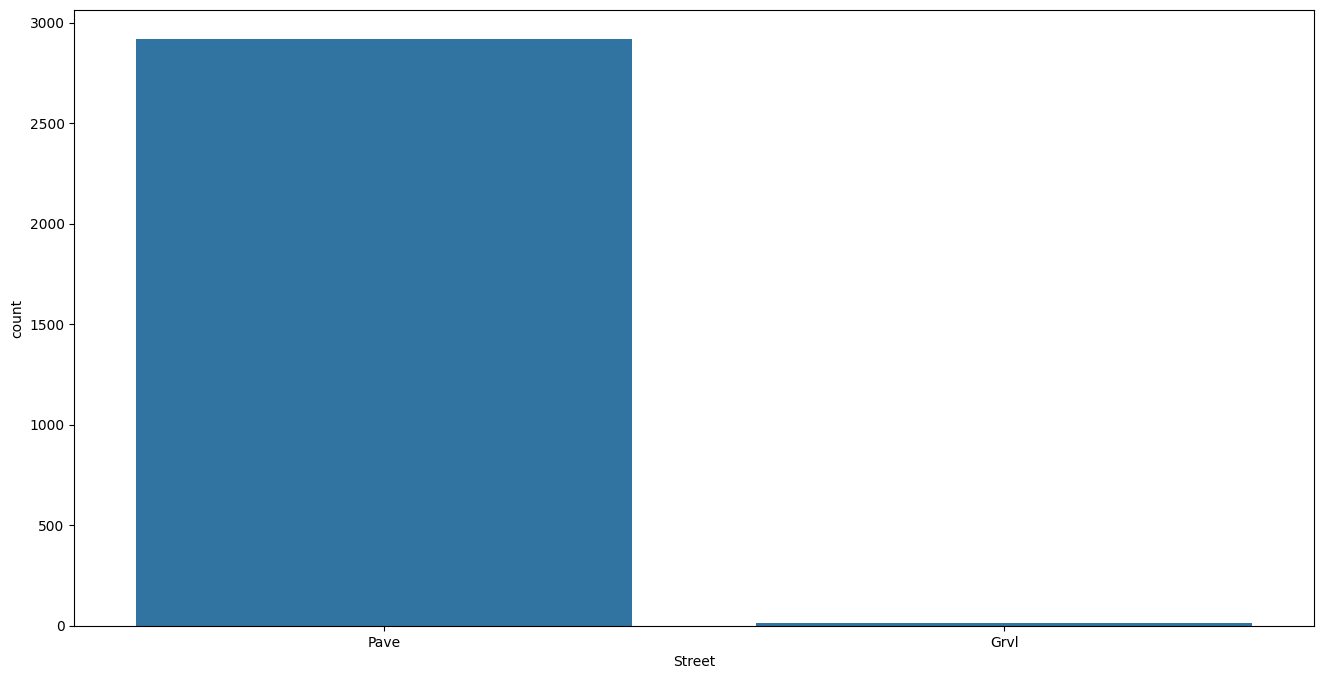

In [61]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Street', data=housing)
plt.show()

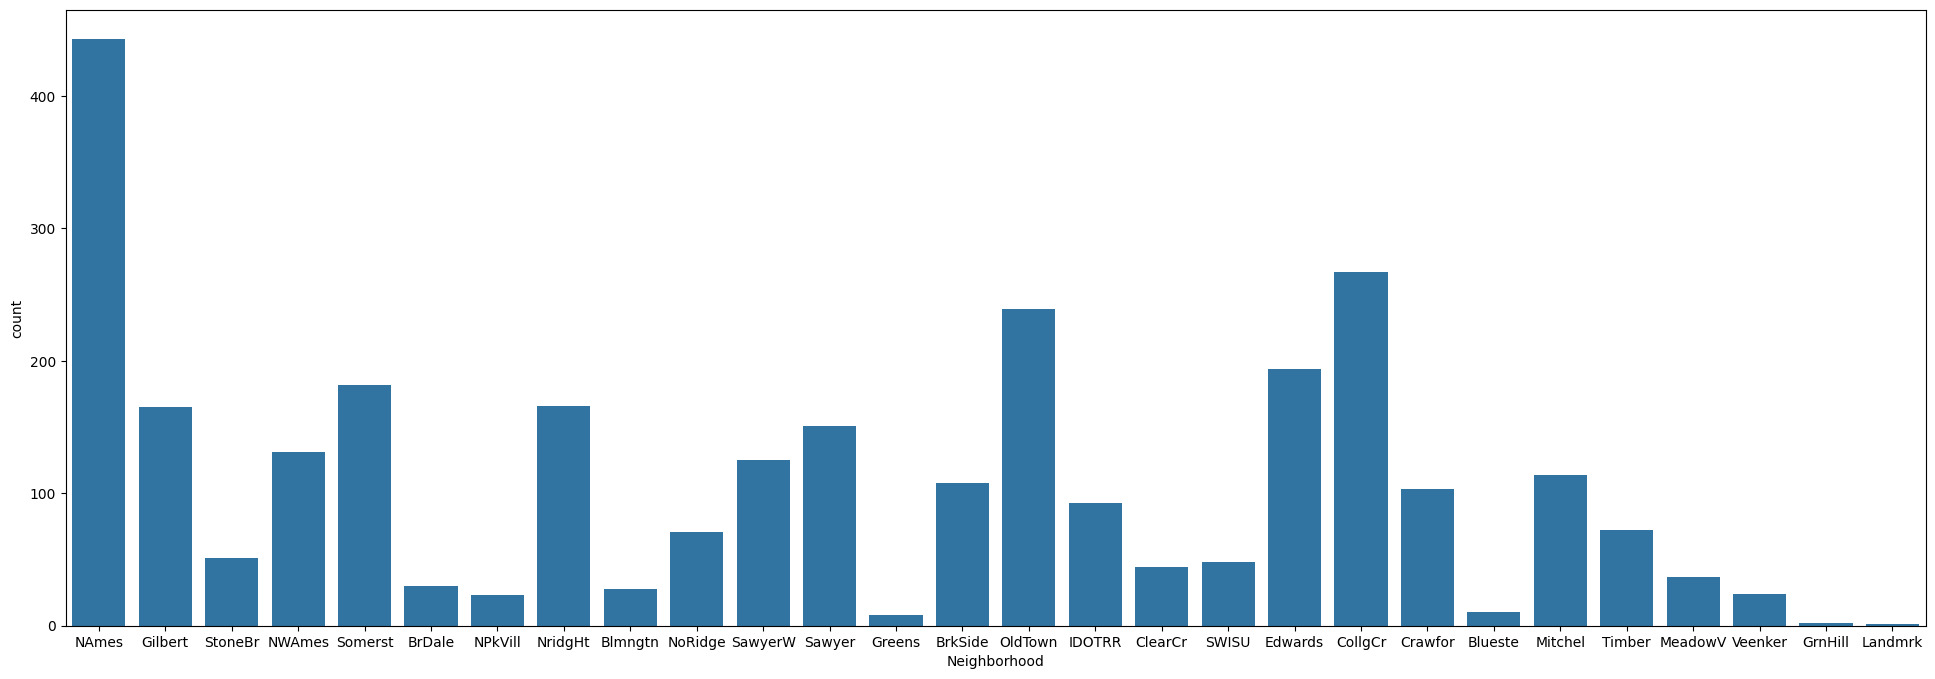

In [63]:
plt.figure(figsize=(24, 8))
sns.countplot(x='Neighborhood', data=housing)
plt.show()

In [64]:
housing['Neighborhood'].sum()
housing['Neighborhood'].value_counts()

,count
Neighborhood,
NAmes,443
CollgCr,267
OldTown,239
Edwards,194
Somerst,182
NridgHt,166
Gilbert,165
Sawyer,151
NWAmes,131


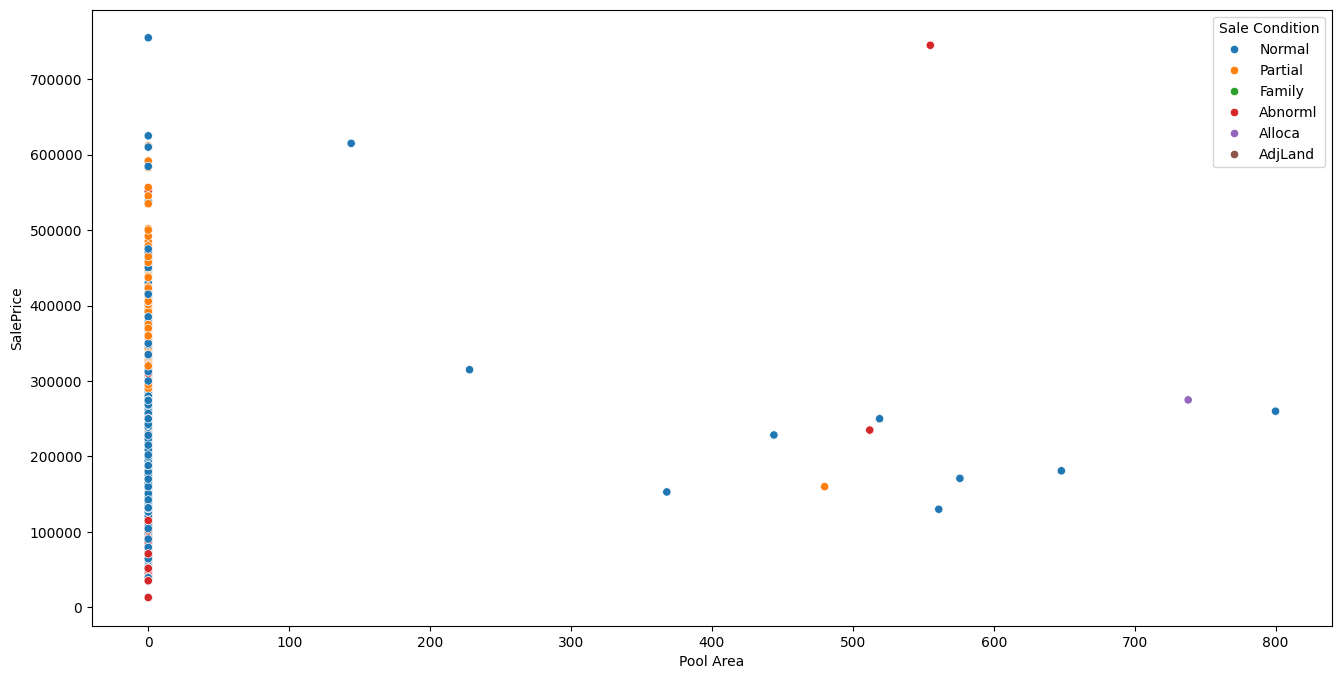

In [66]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Pool Area', y='SalePrice', hue='Sale Condition' ,data=housing)
plt.show()

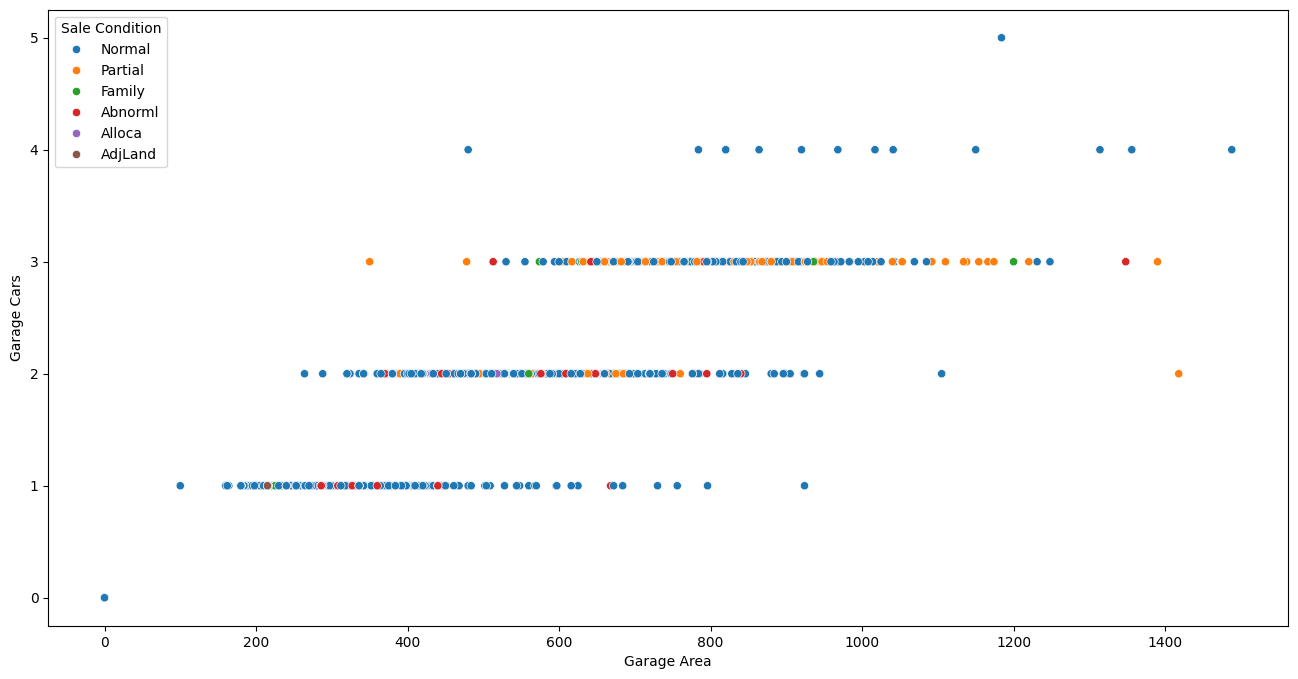

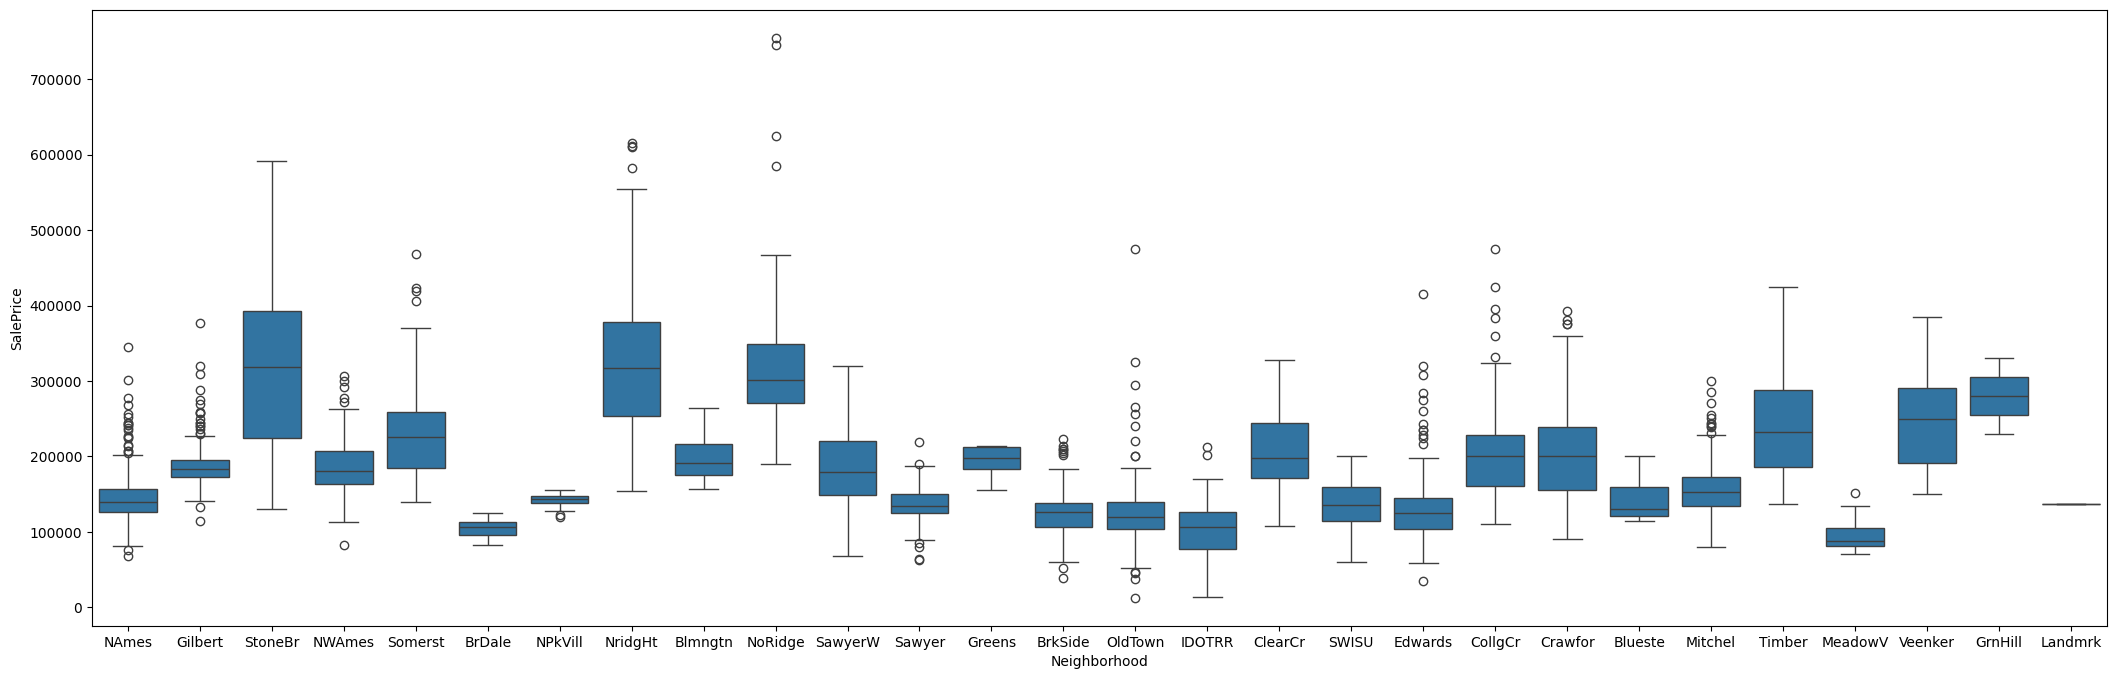

In [71]:
plt.figure(figsize=(26, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing)
plt.show()

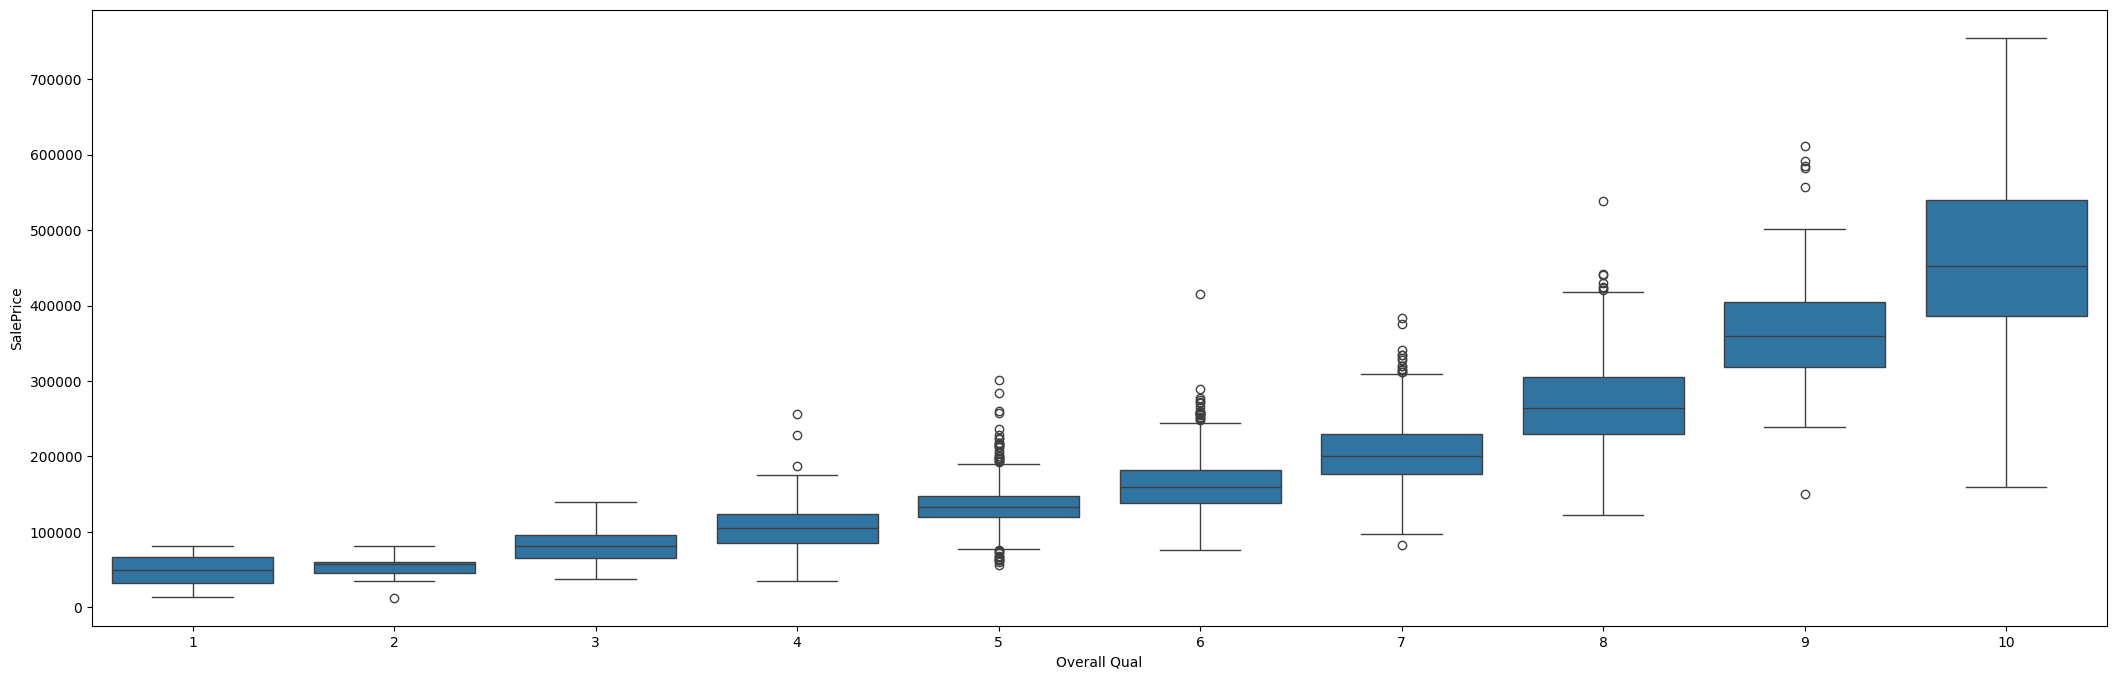

In [72]:
plt.figure(figsize=(26, 8))
sns.boxplot(x='Overall Qual', y='SalePrice', data=housing)
plt.show()

In [83]:
housing['saleprice'].head()

,saleprice
0,215000
1,105000
2,172000
3,244000
4,189900


In [84]:
housing['saleprice'].tail()

,saleprice
2925,142500
2926,131000
2927,132000
2928,170000
2929,188000


In [85]:
precios_maximos=housing['saleprice'].max()
precios_minimos=housing['saleprice'].min()
print(f'El precio maximo es: {precios_maximos}')
print(f'El precio minimo es: {precios_minimos}')

El precio maximo es: 755000
El precio minimo es: 12789


In [93]:
promedios = housing.groupby('neighborhood')['saleprice'].mean().reset_index()
print(promedios)

   neighborhood      saleprice
0       Blmngtn  196661.678571
1       Blueste  143590.000000
2        BrDale  105608.333333
3       BrkSide  124756.250000
4       ClearCr  208662.090909
5       CollgCr  201803.434457
6       Crawfor  207550.834951
7       Edwards  130843.381443
8       Gilbert  190646.575758
9        Greens  193531.250000
10      GrnHill  280000.000000
11       IDOTRR  103752.903226
12      Landmrk  137000.000000
13      MeadowV   95756.486486
14      Mitchel  162226.631579
15        NAmes  145097.349887
16      NPkVill  140710.869565
17       NWAmes  188406.908397
18      NoRidge  330319.126761
19      NridgHt  322018.265060
20      OldTown  123991.891213
21        SWISU  135071.937500
22       Sawyer  136751.152318
23      SawyerW  184070.184000
24      Somerst  229707.324176
25      StoneBr  324229.196078
26       Timber  246599.541667
27      Veenker  248314.583333


In [94]:
promedios_ord = promedios.sort_values(by='saleprice', ascending=False)
print(promedios_ord)

   neighborhood      saleprice
18      NoRidge  330319.126761
25      StoneBr  324229.196078
19      NridgHt  322018.265060
10      GrnHill  280000.000000
27      Veenker  248314.583333
26       Timber  246599.541667
24      Somerst  229707.324176
4       ClearCr  208662.090909
6       Crawfor  207550.834951
5       CollgCr  201803.434457
0       Blmngtn  196661.678571
9        Greens  193531.250000
8       Gilbert  190646.575758
17       NWAmes  188406.908397
23      SawyerW  184070.184000
14      Mitchel  162226.631579
15        NAmes  145097.349887
1       Blueste  143590.000000
16      NPkVill  140710.869565
12      Landmrk  137000.000000
22       Sawyer  136751.152318
21        SWISU  135071.937500
7       Edwards  130843.381443
3       BrkSide  124756.250000
20      OldTown  123991.891213
2        BrDale  105608.333333
11       IDOTRR  103752.903226
13      MeadowV   95756.486486
